# 정밀도(Precision)와 재현율(Recall)의 교환(trade off)


#### --▶ Wine Dataset

In [2]:
import pandas as pd

wine = pd.read_csv("../dataset/wine.csv", index_col=0)
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(columns=['taste', 'quality'])
y = wine['taste']

#### --▶ Split Data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#### --▶ Logistic Regression

- 간단한 로지스틱 회귀를 적용한다.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc :', accuracy_score(y_train, y_pred_tr))
print('Test Acc :', accuracy_score(y_test, y_pred_test))

Train Acc : 0.7425437752549547
Test Acc : 0.7438461538461538


#### --▶ 📍 __classification_report__

- **precision** --> 모델이 긍정으로 예측한 경우 중 실제로 긍정인 비율

- **recall** --> 실제 긍정 중 모델이 긍정으로 올바르게 예측한 비율

- **support** --> 분류된 데이터 개수 (전체 데이터 1300개)

- **macro avg** --> 각 클래스 별 precision, recall, f1-score 값들의 평균

- **weighted avg** --> 클래스 별 분포를 반영한 평균

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test, target_names=['Taste Bad(0)', 'Taste Good(1)']))

               precision    recall  f1-score   support

 Taste Bad(0)       0.68      0.58      0.62       477
Taste Good(1)       0.77      0.84      0.81       823

     accuracy                           0.74      1300
    macro avg       0.73      0.71      0.71      1300
 weighted avg       0.74      0.74      0.74      1300



In [25]:
print(round((0.68 + 0.77) / 2, 2)) #--> precision macro avg
print(round(0.68 * (477/1300) + 0.77 * (823/1300), 2)) #--> precision weighted avg

0.73
0.74


In [26]:
print(round((0.58 + 0.84) / 2, 2)) #--> recall macro avg
print(round(0.58 * (477/1300) + 0.84 * (823/1300), 2)) #--> recall weighted avg

0.71
0.74


#### --▶ 📍 confusion_matrix

- 오차 행렬
	
	<img src="https://github.com/ElaYJ/supplement/assets/153154981/80cde28d-1cb5-47eb-b9cb-09ce9d024c3f" width="67%" height="67%">

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_test)
# [0]은 275개를 맞췄고, 202개를 틀렸다. --> 0은 잘 못 맞췄고,
# [1]은 131개를 틀렸고, 692개를 맞췄다. --> 1은 잘 맞춘 편이다.

array([[275, 202],
       [131, 692]], dtype=int64)

#### --▶ 📍 precision_recall_curve

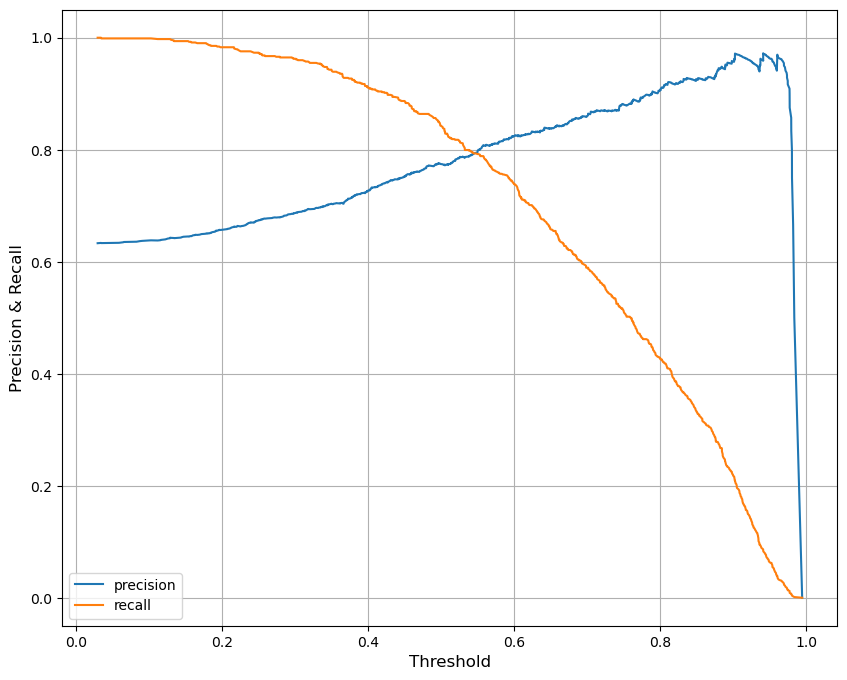

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

pred = lr.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.figure(figsize=(10,8))
plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.legend()
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Precision & Recall', fontsize=12)
plt.grid()
plt.show()

#### --▶ threshold==0.5

- 간단히 확인해 보기

In [8]:
pred_proba = lr.predict_proba(X_test)
pred_proba

array([[0.40511422, 0.59488578],
       [0.50942858, 0.49057142],
       [0.1021066 , 0.8978934 ],
       ...,
       [0.2253031 , 0.7746969 ],
       [0.67385289, 0.32614711],
       [0.31468732, 0.68531268]])

In [11]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1, 1)], axis=1)

array([[0.40511422, 0.59488578, 1.        ],
       [0.50942858, 0.49057142, 0.        ],
       [0.1021066 , 0.8978934 , 1.        ],
       ...,
       [0.2253031 , 0.7746969 , 1.        ],
       [0.67385289, 0.32614711, 0.        ],
       [0.31468732, 0.68531268, 1.        ]])

In [9]:
y_pred_test #--> 'taste' 예측

array([1., 0., 1., ..., 1., 0., 1.])

In [28]:
y_pred_test.shape

(1300,)

In [30]:
y_pred_test.reshape(-1, 1) #--> -1은 shape(전체 데이터의 개수)를 유지하라는 옵션, 1은 ×1(by 1)로 만들라는 옵션

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [31]:
y_pred_test.reshape(-1, 1).shape #--> 결과적으로 (1300 × 1)로 만들어 진다.)

(1300, 1)

#### --▶ 📍 Binarizer

- threshold를 바꾼 후

- 다시 classification_report를 확인해 보고,

- confusion_matrix도 확인해 본다.

- `sklearn.preprocessing` 모듈의 `Binarizer` 클래스는 주어진 임계값(threshold)을 기준으로 데이터를 이진(binary) 형태로 변환하는 데 사용된다.

	- 이 클래스는 주로 연속형 데이터를 이진 형태로 변환하여 특정 조건을 기반으로 이진 분류 문제를 다룰 때 유용합니다.

	- 예를 들어, 임계값을 기준으로 특정 특성의 값을 0 또는 1로 변환할 수 있습니다.
	
	- 예를 들어, 임계값이 0.5로 설정되면 0.5보다 작은 값은 0으로, 0.5 이상의 값은 1로 변환됩니다.

	- `Binarizer`를 사용하면 데이터의 변환을 간단하게 수행할 수 있으며, </br>
		데이터 전처리 과정에서 이진 형태의 데이터를 필요로 하는 알고리즘에 유용하게 적용될 수 있습니다.

In [12]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:,1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [32]:
binarizer.transform(pred_proba)

array([[0., 0.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [33]:
print(classification_report(y_test, pred_bin, target_names=['Taste Bad(0)', 'Taste Good(1)']))

               precision    recall  f1-score   support

 Taste Bad(0)       0.62      0.73      0.67       477
Taste Good(1)       0.82      0.74      0.78       823

     accuracy                           0.74      1300
    macro avg       0.72      0.73      0.72      1300
 weighted avg       0.75      0.74      0.74      1300



In [34]:
print(classification_report(y_test, y_pred_test, target_names=['Taste Bad(0)', 'Taste Good(1)']))

               precision    recall  f1-score   support

 Taste Bad(0)       0.68      0.58      0.62       477
Taste Good(1)       0.77      0.84      0.81       823

     accuracy                           0.74      1300
    macro avg       0.73      0.71      0.71      1300
 weighted avg       0.74      0.74      0.74      1300



In [14]:
confusion_matrix(y_test, pred_bin)

array([[348, 129],
       [215, 608]], dtype=int64)